# Adam Leśniewski - Recruitment task - CO2 emissions

The goal of the following notebook is to create a prediction model for the CO2 emissions of new cars. The notebook uses "Fuel consumption ratings" prepared by the Canadian government. For predicting CO2 emissions I used 3 different machine learning models: Multiple Linear Regression, Decision tree, and Random Forest.

The topic of predicting CO2 emissions of new cars can be especially interesting regarding the Volkswagen emissions scandal. Machine learning models can be used to predict emission rates which can be compared with manufacturers' declarations.

## Load libraries and styles

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set_theme(color_codes=True)

## Loading input data

Source: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/56a89c09-d609-41cd-8838-9dd9905d3cfc

In [2]:
df_raw = pd.read_csv("2020_Fuel_Consumption_Ratings.csv")
df_colnames = ["Year","Make","Model","Vehicle Class","Engine Size","Cylinders","Transmission","Fueltype","Fuel Consumtion City","Fuel Consumtion Highway","Fuel Consumtion Comb","Fuel Consumtion Comb MPG","CO2 Emissions","CO2 rank","Smog rank"]
df = df_raw[df_colnames]

In [3]:
df.head()

Year   Make              Model Vehicle Class  Engine Size  Cylinders  \
0  2020  Acura                ILX       Compact          2.4          4   
1  2020  Acura         MDX SH-AWD    SUV: Small          3.5          6   
2  2020  Acura  MDX SH-AWD A-SPEC    SUV: Small          3.5          6   
3  2020  Acura     MDX Hybrid AWD    SUV: Small          3.0          6   
4  2020  Acura            RDX AWD    SUV: Small          2.0          4   

  Transmission Fueltype  Fuel Consumtion City  Fuel Consumtion Highway  \
0          AM8        Z                   9.9                      7.0   
1          AS9        Z                  12.3                      9.2   
2          AS9        Z                  12.2                      9.5   
3          AM7        Z                   9.1                      9.0   
4         AS10        Z                  11.0                      8.6   

   Fuel Consumtion Comb  Fuel Consumtion Comb MPG  CO2 Emissions  CO2 rank  \
0                   8.6                        33            199         6   
1                  10.9                        26            254         4   
2                  11.0                        26            258         4   
3                   9.0                        31            210         5   
4                   9.9                        29            232         5   

   Smog rank  
0          3  
1          3  
2          3  
3          3  
4          6

## Basic descriptive statistics

In [4]:
df.shape

(967, 15)

In [5]:
df.dtypes

Year                          int64
Make                         object
Model                        object
Vehicle Class                object
Engine Size                 float64
Cylinders                     int64
Transmission                 object
Fueltype                     object
Fuel Consumtion City        float64
Fuel Consumtion Highway     float64
Fuel Consumtion Comb        float64
Fuel Consumtion Comb MPG      int64
CO2 Emissions                 int64
CO2 rank                      int64
Smog rank                     int64
dtype: object

In [6]:
df.describe(include = "all")

Year Make       Model Vehicle Class  Engine Size   Cylinders  \
count    967.0  967         967           967   967.000000  967.000000   
unique     NaN   39         726            15          NaN         NaN   
top        NaN  BMW  Sierra 4WD    SUV: Small          NaN         NaN   
freq       NaN   84           7           188          NaN         NaN   
mean    2020.0  NaN         NaN           NaN     3.161324    5.687694   
std        0.0  NaN         NaN           NaN     1.353484    1.943211   
min     2020.0  NaN         NaN           NaN     1.000000    3.000000   
25%     2020.0  NaN         NaN           NaN     2.000000    4.000000   
50%     2020.0  NaN         NaN           NaN     3.000000    6.000000   
75%     2020.0  NaN         NaN           NaN     3.800000    6.000000   
max     2020.0  NaN         NaN           NaN     8.000000   16.000000   

       Transmission Fueltype  Fuel Consumtion City  Fuel Consumtion Highway  \
count           967      967            967.000000               967.000000   
unique           24        4                   NaN                      NaN   
top             AS8        Z                   NaN                      NaN   
freq            239      481                   NaN                      NaN   
mean            NaN      NaN             12.459772                 9.149431   
std             NaN      NaN              3.442672                 2.124694   
min             NaN      NaN              4.200000                 4.000000   
25%             NaN      NaN             10.100000                 7.700000   
50%             NaN      NaN             12.100000                 8.900000   
75%             NaN      NaN             14.300000                10.400000   
max             NaN      NaN             28.100000                18.100000   

        Fuel Consumtion Comb  Fuel Consumtion Comb MPG  CO2 Emissions  \
count             967.000000                967.000000     967.000000   
unique                   NaN                       NaN            NaN   
top                      NaN                       NaN            NaN   
freq                     NaN                       NaN            NaN   
mean               10.969804                 27.467425     254.794209   
std                 2.810450                  7.453703      61.006839   
min                 4.100000                 12.000000      96.000000   
25%                 9.100000                 23.000000     213.000000   
50%                10.700000                 26.000000     252.000000   
75%                12.500000                 31.000000     290.500000   
max                23.000000                 69.000000     537.000000   

          CO2 rank   Smog rank  
count   967.000000  967.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean      4.489142    4.448811  
std       1.693257    1.766146  
min       1.000000    1.000000  
25%       3.000000    3.000000  
50%       4.000000    5.000000  
75%       5.000000    6.000000  
max      10.000000    7.000000

## Data visualization

### Output variable - CO2 Emission

In [7]:
sns.displot(df["CO2 Emissions"])

In [8]:
sns.boxplot(x = df["CO2 Emissions"])

<AxesSubplot:xlabel='CO2 Emissions'>

### Quantitative variables

#### Engine parameters

<AxesSubplot:xlabel='Engine Size', ylabel='CO2 Emissions'>

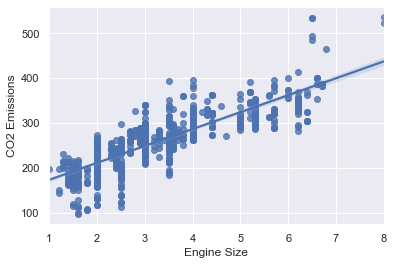

In [9]:
sns.regplot(x="Engine Size", y="CO2 Emissions", data=df)

In [10]:
sns.regplot(x="Cylinders", y="CO2 Emissions", data=df)

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions'>

#### Fuel consumption

Fuel consumption,"City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km

In [11]:
sns.regplot(x="Fuel Consumtion City", y="CO2 Emissions", data=df)

<AxesSubplot:xlabel='Fuel Consumtion City', ylabel='CO2 Emissions'>

<AxesSubplot:xlabel='Fuel Consumtion Highway', ylabel='CO2 Emissions'>

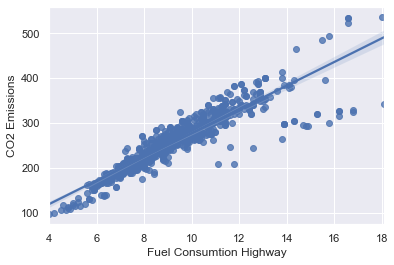

In [12]:
sns.regplot(x="Fuel Consumtion Highway", y="CO2 Emissions", data=df)

<AxesSubplot:xlabel='Fuel Consumtion Comb', ylabel='CO2 Emissions'>

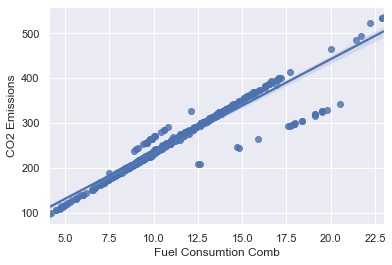

In [13]:
sns.regplot(x="Fuel Consumtion Comb", y="CO2 Emissions", data=df)

### Categorical variables

In [14]:
plot_order = df.groupby('Vehicle Class')['CO2 Emissions'].mean().sort_values(ascending=False).index.values
sns.catplot(x="CO2 Emissions", y="Vehicle Class", data=df, order=plot_order)

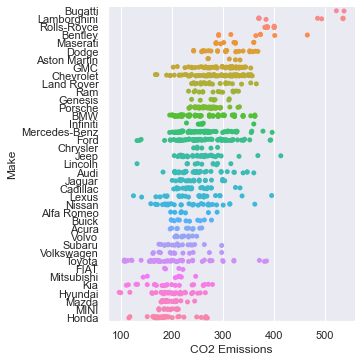

In [15]:
plot_order = df.groupby('Make')['CO2 Emissions'].mean().sort_values(ascending=False).index.values
sns.catplot(x="CO2 Emissions", y="Make", data=df, order=plot_order)

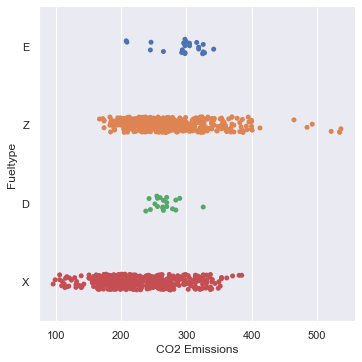

In [16]:
plot_order = df.groupby('Fueltype')['CO2 Emissions'].mean().sort_values(ascending=False).index.values
sns.catplot(x="CO2 Emissions", y="Fueltype", data=df, order=plot_order)

Fuel type:
- X = regular gasoline
- Z = premium gasoline
- D = diesel
- E = ethanol (E85)

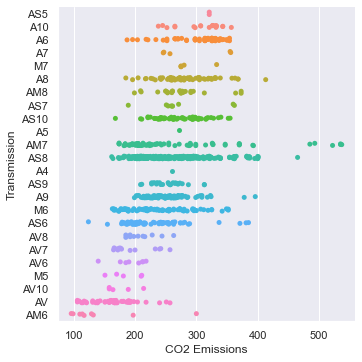

In [17]:
plot_order = df.groupby('Transmission')['CO2 Emissions'].mean().sort_values(ascending=False).index.values
sns.catplot(x="CO2 Emissions", y="Transmission", data=df, order=plot_order)

Transmission:
- A = automatic
- AM = automated manual
- AS = automatic with select shift
- AV = continuously variable
- M = manual
- 3 – 10 = Number of gears

## Preparing dataset for model building

In [18]:
x_quantitive_colnames = ["Engine Size","Cylinders"]
x_categorical_colnames = ["Vehicle Class","Transmission","Fueltype"]
y_colname = ["CO2 Emissions"]

data_for_model = df[y_colname + x_quantitive_colnames + x_categorical_colnames].copy()
data_for_model.head()

CO2 Emissions  Engine Size  Cylinders Vehicle Class Transmission Fueltype
0            199          2.4          4       Compact          AM8        Z
1            254          3.5          6    SUV: Small          AS9        Z
2            258          3.5          6    SUV: Small          AS9        Z
3            210          3.0          6    SUV: Small          AM7        Z
4            232          2.0          4    SUV: Small         AS10        Z

### Data normalization for quantitive variables

In [19]:
data_for_model[y_colname + x_quantitive_colnames] = StandardScaler().fit_transform(data_for_model[y_colname + x_quantitive_colnames].copy())

### One-Hot Encoding for categorical variables

In [20]:
one_hot = pd.get_dummies(data_for_model[x_categorical_colnames]) # Get one hot encoding of columns
data_for_model = data_for_model.drop(x_categorical_colnames,axis = 1) # Drop columns as it is now encoded
data_for_model = data_for_model.join(one_hot) # Join the encoded df

In [21]:
data_for_model.head()

CO2 Emissions  Engine Size  Cylinders  Vehicle Class_Compact  \
0      -0.915030    -0.562783  -0.868957                      1   
1      -0.013025     0.250355   0.160800                      0   
2       0.052575     0.250355   0.160800                      0   
3      -0.734629    -0.119253   0.160800                      0   
4      -0.373827    -0.858469  -0.868957                      0   

   Vehicle Class_Full-size  Vehicle Class_Mid-size  Vehicle Class_Minicompact  \
0                        0                       0                          0   
1                        0                       0                          0   
2                        0                       0                          0   
3                        0                       0                          0   
4                        0                       0                          0   

   Vehicle Class_Minivan  Vehicle Class_Pickup truck: Small  \
0                      0                                  0   
1                      0                                  0   
2                      0                                  0   
3                      0                                  0   
4                      0                                  0   

   Vehicle Class_Pickup truck: Standard  ...  Transmission_AV6  \
0                                     0  ...                 0   
1                                     0  ...                 0   
2                                     0  ...                 0   
3                                     0  ...                 0   
4                                     0  ...                 0   

   Transmission_AV7  Transmission_AV8  Transmission_M5  Transmission_M6  \
0                 0                 0                0                0   
1                 0                 0                0                0   
2                 0                 0                0                0   
3                 0                 0                0                0   
4                 0                 0                0                0   

   Transmission_M7  Fueltype_D  Fueltype_E  Fueltype_X  Fueltype_Z  
0                0           0           0           0           1  
1                0           0           0           0           1  
2                0           0           0           0           1  
3                0           0           0           0           1  
4                0           0           0           0           1  

[5 rows x 46 columns]

### Split dataset into train and test sets

In [22]:
training_data, testing_data = train_test_split(data_for_model, test_size=0.2, random_state=25)
training_data_y = training_data[y_colname]
training_data_x = training_data.drop(y_colname, axis=1)
testing_data_y = testing_data[y_colname]
testing_data_x = testing_data.drop(y_colname, axis=1)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 773
No. of testing examples: 194


## Building models

In [23]:
def get_prediction_metrics(testing_data_y, y_pred):
    
    # The mean absolute error
    mae = mean_absolute_error(testing_data_y, y_pred)
    print('Mean absolute error: %.2f'
          % mae)
    
    # The mean squared error
    mse = mean_squared_error(testing_data_y, y_pred)
    print('Mean squared error: %.2f'
          % mse)

    # The root mean squared error
    rmse = math.sqrt(mean_squared_error(testing_data_y, y_pred))
    print('Root mean squared error: %.2f'
          % rmse)

    r2 = r2_score(testing_data_y, y_pred)
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(testing_data_y, y_pred))
    
    return mae, mse, rmse, r2

### Multiple Linear Regression

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(training_data_x, training_data_y)

# Make predictions using the testing set
y_pred= regr.predict(testing_data_x)

regr_mae, regr_mse, regr_rmse, regr_r2 = get_prediction_metrics(testing_data_y, y_pred)

Mean absolute error: 0.29
Mean squared error: 0.15
Root mean squared error: 0.39
Coefficient of determination: 0.85


### Decision tree

In [25]:
# Create decision tree object
tree = DecisionTreeRegressor(random_state=0)

# Train the model using the training sets
tree.fit(training_data_x, training_data_y)

# Make predictions using the testing set
y_pred= tree.predict(testing_data_x)

tree_mae, tree_mse, tree_rmse, tree_r2 = get_prediction_metrics(testing_data_y, y_pred)

Mean absolute error: 0.27
Mean squared error: 0.16
Root mean squared error: 0.40
Coefficient of determination: 0.84


### Random Forest

In [26]:
# Create random forest object
forest = RandomForestRegressor(max_depth=10, random_state=0)

# Train the model using the training sets
forest.fit(training_data_x, training_data_y.values.ravel())

# Make predictions using the testing set
y_pred= forest.predict(testing_data_x)

forest_mae, forest_mse, forest_rmse, forest_r2 = get_prediction_metrics(testing_data_y, y_pred)

Mean absolute error: 0.29
Mean squared error: 0.15
Root mean squared error: 0.39
Coefficient of determination: 0.85


## Model evaluation

In [27]:
# assign data of lists.  
data = {'Mean absolute error':[regr_mae, tree_mae, forest_mae], 'Mean squared error':[regr_mse, tree_mse, forest_mse], 'Root mean squared error':[regr_rmse,tree_rmse,forest_rmse], 'R2':[regr_r2, tree_r2, forest_r2]}  
models_comparision = pd.DataFrame(data, index =['Multiple Linear Regression', 'Decision Tree', 'Random forest'])  
  
# print the data  
models_comparision.round(3)

Mean absolute error  Mean squared error  \
Multiple Linear Regression                0.293               0.154   
Decision Tree                             0.273               0.162   
Random forest                             0.291               0.149   

                            Root mean squared error     R2  
Multiple Linear Regression                    0.393  0.848  
Decision Tree                                 0.402  0.841  
Random forest                                 0.386  0.853

Text(0.5, 1.0, 'R2')

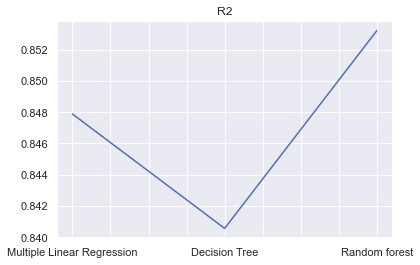

In [28]:
models_comparision["R2"].plot()
plt.title('R2')

Text(0.5, 1.0, 'Mean squared error')

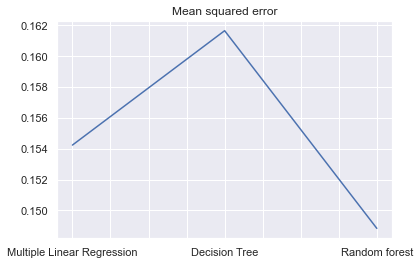

In [29]:
models_comparision["Mean squared error"].plot()
plt.title('Mean squared error')

Text(0.5, 1.0, 'Root mean squared error')

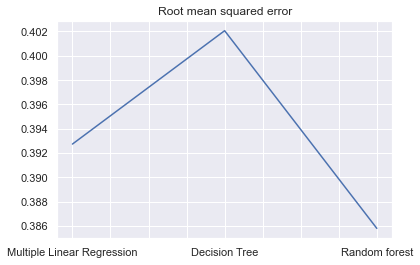

In [30]:
models_comparision["Root mean squared error"].plot()
plt.title('Root mean squared error')

Text(0.5, 1.0, 'Mean absolute error')

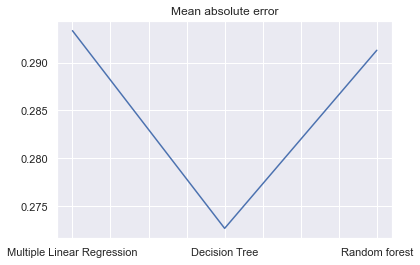

In [31]:
models_comparision["Mean absolute error"].plot()
plt.title('Mean absolute error')